In [1]:
from arcgis.features import *
import arcgis

In [2]:
lyr_url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Education_WebMercator/MapServer/5'
schools_layer = FeatureLayer(lyr_url)
all_features = schools_layer.query()
schools = all_features.df
schools.head()

,ADDRESS,BLDG_NUM,CAPACITY,CAPITALGAINS,FACUSE,GIS_ID,GRADES,LATITUDE,LEA_ID,LEA_NAME,...,SSL,STATUS,TOTAL_STUD,UN_CE,WEB_URL,XCOORD,YCOORD,YEAR_BUILT,ZIPCODE,SHAPE
0,1400 BRUCE PLACE SE,416.0,NaN,N,Middle School,dcps_416,6th-8th,38.851337,1,District of Columbia Public Schools,...,,Active,252.0,None,http://profiles.dcps.dc.gov/Johnson+Middle+School,401414.57,131503.42,1969.0,20020,"{'x': -8569786.945840795, 'y': 4700400.240281109}"
1,1503 10TH STREET NW,309.0,428.0,N,Elementary School,dcps_309,PK3-5th,38.910619,1,District of Columbia Public Schools,...,,Active,341.0,None,http://seatondc.org/,397841.92,138084.32,1969.0,20001,"{'x': -8574370.949081799, 'y': 4708877.609095476}"
2,4301 13TH STREET NW,459.0,NaN,N,Youth Engagement,dcps_913,9th-12th,38.943029,1,District of Columbia Public Schools,...,,Active,668.0,7,http://www.rooseveltstay.org/,397468.88,141682.30,NaN,20011,"{'x': -8574851.562455568, 'y': 4713515.825209171}"
3,650 ANACOSTIA AVENUE NE,325.0,636.0,N,Elementary School,dcps_325,PK3-5th,38.901279,1,District of Columbia Public Schools,...,,Active,409.0,None,http://www.nevalthomas.org/,404154.01,137048.33,1946.0,20019,"{'x': -8566270.053998448, 'y': 4707541.547762988}"
4,219 50TH STREET SE,288.0,460.0,N,Elementary School,dcps_288,PK3-5th,38.885954,1,District of Columbia Public Schools,...,,Active,391.0,None,http://profiles.dcps.dc.gov/Nalle+Elementary+S...,406004.16,135348.37,1950.0,20019,"{'x': -8563897.34436059, 'y': 4705349.728299234}"


### Total number of students

In [3]:
print('Total number of schools')
print(schools.shape[0])

Total number of schools
122


In [4]:
neighborhood_layer = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/17'

In [10]:
#Connecting to the GIS
from arcgis.gis import GIS
gis = GIS('http://dcdev.maps.arcgis.com/', 'mmajumdar_dcdev')

Enter password: ········


### Number of schools in a neighborhood

In [11]:
joined = arcgis.features.analysis.join_features(neighborhood_layer, lyr_url, spatial_relationship='Intersects', output_name='schools_in_neighborhood')
joined.share(everyone=True)
joined_url = str(joined.url)+'/0/'
joined_layer = FeatureLayer(joined_url)
joined_features = joined_layer.query()
joined_df = joined_features.df

In [16]:
joined_df.columns

Index(['ADDRESS', 'BLDG_NUM', 'CAPACITY', 'CAPITALGAINS', 'FACUSE', 'GIS_ID',
       'GRADES', 'Join_Count', 'LATITUDE', 'LEA_ID', 'LEA_NAME', 'LEVEL_',
       'LONGITUDE', 'MAR_ID', 'NAME', 'NAME_1', 'NBH_NAMES', 'OBJECTID',
       'PHONE', 'PK3', 'PK4', 'POPULATION_PLAN', 'SCHOOL_ID', 'SCHOOL_NAM',
       'SCHOOL_YEA', 'SCH_PROG', 'SQUARE_FOOTAGE', 'SSL', 'STATUS',
       'TOTAL_STUD', 'TYPE', 'UN_CE', 'WEB_URL', 'WEB_URL_1', 'XCOORD',
       'YCOORD', 'YEAR_BUILT', 'ZIPCODE', 'SHAPE'],
      dtype='object')

In [27]:
temp = joined_df[['NBH_NAMES', 'Join_Count']]
temp[temp['NBH_NAMES']=='Shaw, Logan Circle']

,NBH_NAMES,Join_Count
9,"Shaw, Logan Circle",2


### Relevant details of a particular school

In [22]:
temp = schools[['NAME', 'ADDRESS', 'PHONE', 'WEB_URL', 'FACUSE', 'GRADES', 'TOTAL_STUD', 'CAPACITY', 'YEAR_BUILT']]
temp[temp['NAME']=='Excel Academy']

,NAME,ADDRESS,PHONE,WEB_URL,FACUSE,GRADES,TOTAL_STUD,CAPACITY,YEAR_BUILT
121,Excel Academy,2501 MARTIN LUTHER KING JR AVENUE SE,202-373-0097,http://www.excelpcs.org,Education Campus,PK3-8th,NaN,NaN,NaN


### Mean number of students in schools in DC

In [28]:
schools['TOTAL_STUD'].mean()

437.8290598290598

### Total number of enrolled students in DC

In [29]:
schools['TOTAL_STUD'].sum()

51226.0

### School with min and max students

In [32]:
temp = schools[['NAME', 'FACUSE', 'TOTAL_STUD']]
temp.max()

NAME          Youth Services Center
FACUSE             Youth Engagement
TOTAL_STUD                     1750
dtype: object

In [33]:
temp.min()

NAME          Aiton Elementary School
FACUSE                    Arts Center
TOTAL_STUD                          5
dtype: object

### Bar chart for school type and counts

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [34]:
#Frequency calculation of each crime type
counts = schools['FACUSE'].value_counts()
print(counts)

Elementary School                72
Middle School                    16
High School                      10
Youth Engagement                  7
Education Campus                  7
High School/Specialized           5
Elementary School/Specialized     2
Arts Center                       2
Special Education                 1
Name: FACUSE, dtype: int64


Text(0.5,1,'Count of schools in DC based on type')

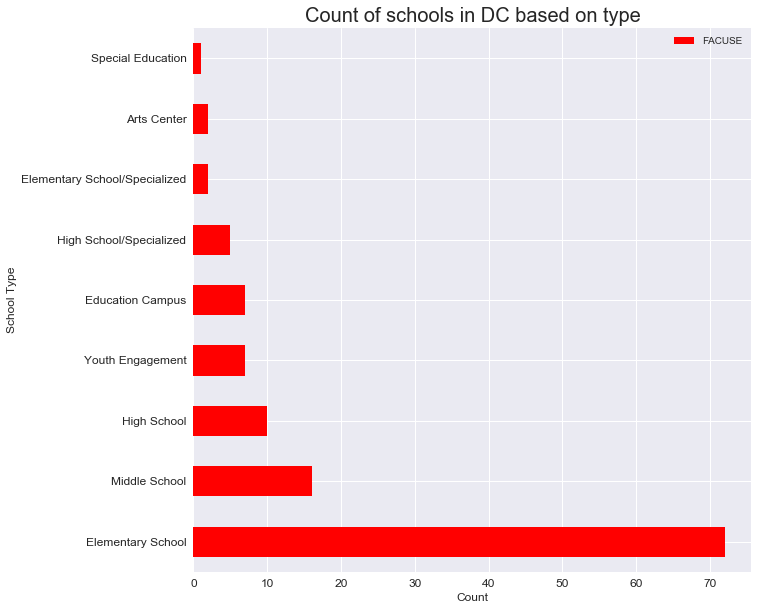

In [37]:
#Generates bar graph
ax = counts.plot(kind='barh', figsize=(10, 10), legend=True, fontsize=12, color='red')

#X axis text and display style of categories
ax.set_xlabel("Count", fontsize=12)
#plt.xticks(rotation=45)

#Y axis text
ax.set_ylabel("School Type", fontsize=12)

#Title
ax.set_title("Count of schools in DC based on type", fontsize=20)

### Scatter plot for capacity of school v/s neighborhood population

In [38]:
enriched_neighborhood = arcgis.features.enrich_data.enrich_layer(neighborhood_layer, analysis_variables=['TOTPOP_CY'], output_name="Enriched_Neighborhoods_Pop")

In [39]:
enriched_neighborhood.share(everyone=True)
enriched_url = str(enriched_neighborhood.url)+'/0/'
enriched_layer = FeatureLayer(enriched_url)
enriched_features = enriched_layer.query()
enriched_df = enriched_features.df

In [42]:
joined_reverse = arcgis.features.analysis.join_features(lyr_url, enriched_url, spatial_relationship='Intersects', output_name='neighborhood_in_schools')
joined_reverse.share(everyone=True)
joined_reverse_url = str(joined_reverse.url)+'/0/'
joined_layer = FeatureLayer(joined_reverse_url)
joined_features = joined_layer.query()
joined_reverse_df = joined_features.df

In [43]:
joined_reverse_df.columns

Index(['ADDRESS', 'BLDG_NUM', 'CAPACITY', 'CAPITALGAINS', 'ENRICH_FID',
       'FACUSE', 'GIS_ID', 'GRADES', 'HasData', 'ID', 'Join_Count', 'LATITUDE',
       'LEA_ID', 'LEA_NAME', 'LEVEL_', 'LONGITUDE', 'MAR_ID', 'NAME', 'NAME_1',
       'NBH_NAMES', 'OBJECTID', 'PHONE', 'PK3', 'PK4', 'POPULATION_PLAN',
       'SCHOOL_ID', 'SCHOOL_NAM', 'SCHOOL_YEA', 'SCH_PROG', 'SQUARE_FOOTAGE',
       'SSL', 'STATUS', 'TOTAL_STUD', 'TOTPOP_CY', 'TYPE', 'UN_CE', 'WEB_URL',
       'WEB_URL_1', 'XCOORD', 'YCOORD', 'YEAR_BUILT', 'ZIPCODE',
       'aggregationMethod', 'apportionmentConfidence',
       'populationToPolygonSizeRating', 'sourceCountry', 'SHAPE'],
      dtype='object')

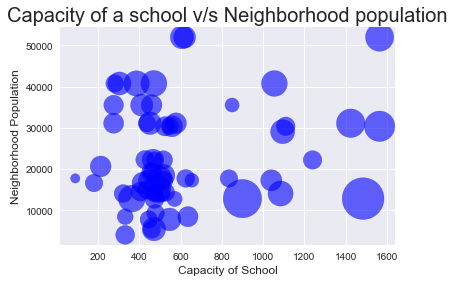

In [49]:
plt.scatter(joined_reverse_df['CAPACITY'], joined_reverse_df['TOTPOP_CY'], s=joined_reverse_df['TOTAL_STUD'], c='blue', alpha=0.6)

#X axis text and display style of categories
plt.xlabel("Capacity of School", fontsize=12)
#plt.xticks(rotation=45)

#Y axis text
plt.ylabel("Neighborhood Population", fontsize=12)

#Title
plt.title("Capacity of a school v/s Neighborhood population", fontsize=20)
plt.show()

#### Actual plot should allow hovering with school name and number_of_students as tooltip text